In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [67]:
warnings.filterwarnings('ignore')


In [68]:
sales_data = pd.read_csv('sales_data.csv')

In [69]:
sales_data.head(5)


,Date,Product,Region,Units Sold,Unit Price,Total Sales
0,2024-01-01,Clothing,South,40,275.402517,11016.100698
1,2024-01-02,Clothing,South,51,946.638119,48278.544053
2,2024-01-03,Electronics,West,15,68.757222,1031.358328
3,2024-01-04,Electronics,West,35,546.707440,19134.760392
4,2024-01-05,Electronics,North,10,921.104220,9211.042204


In [70]:
sales_data.columns

Index(['Date', 'Product', 'Region', 'Units Sold', 'Unit Price', 'Total Sales'], dtype='object')

In [71]:
sales_data.isnull().sum()

Date           0
Product        0
Region         0
Units Sold     0
Unit Price     0
Total Sales    0
dtype: int64

In [72]:
sales_data.duplicated().sum()

0

In [73]:
sales_data["Total Sales"].sum()

8889830.285973264

In [74]:
sales_data['Day_of_week'] = pd.to_datetime(sales_data['Date']).dt.strftime("%A")


In [75]:
sales_data['month'] = pd.to_datetime(sales_data['Date']).dt.strftime("%b")


In [76]:
Q1 = ['Jan','Feb','Mar']
Q2 = ['Apr','May','Jun']
Q3 = ['Jul','Aug','Sep']
Q4 = ['Oct','Nov','Dec']

def month_handler(row):
    if row['month'] in Q1:
        return 'Q1'
    if row['month'] in Q2:
        return 'Q2'
    if row['month'] in Q3:
        return 'Q3'
    if row['month'] in Q4:
        return 'Q4'

sales_data['Season'] = sales_data.apply(month_handler,axis=1)

In [77]:
sales_data['year'] = pd.to_datetime(sales_data['Date']).dt.strftime("%Y")



In [78]:
sales_data['year'].value_counts()

year
2024    365
Name: count, dtype: int64

In [79]:
sales_data.drop('Date', axis=1, inplace= True)

In [80]:
sales_data.columns

Index(['Product', 'Region', 'Units Sold', 'Unit Price', 'Total Sales',
       'Day_of_week', 'month', 'Season', 'year'],
      dtype='object')

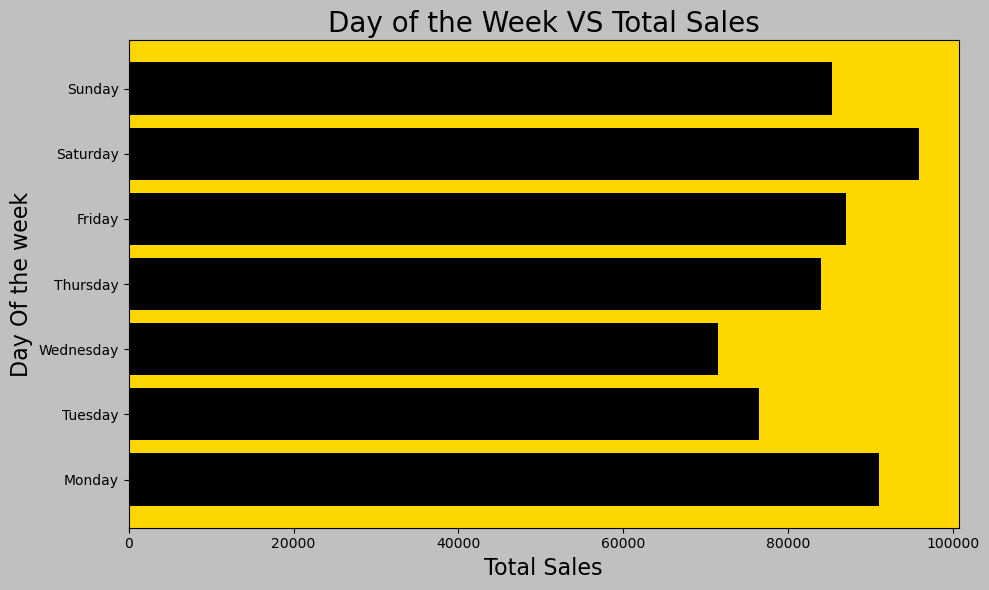

In [81]:
plt.figure(figsize=(10,6))
plt.barh(sales_data['Day_of_week'],sales_data['Total Sales'], color= 'black')
plt.xlabel('Total Sales',fontsize=16)
plt.ylabel('Day Of the week',fontsize=16)
plt.title('Day of the Week VS Total Sales',fontsize=20)
plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')

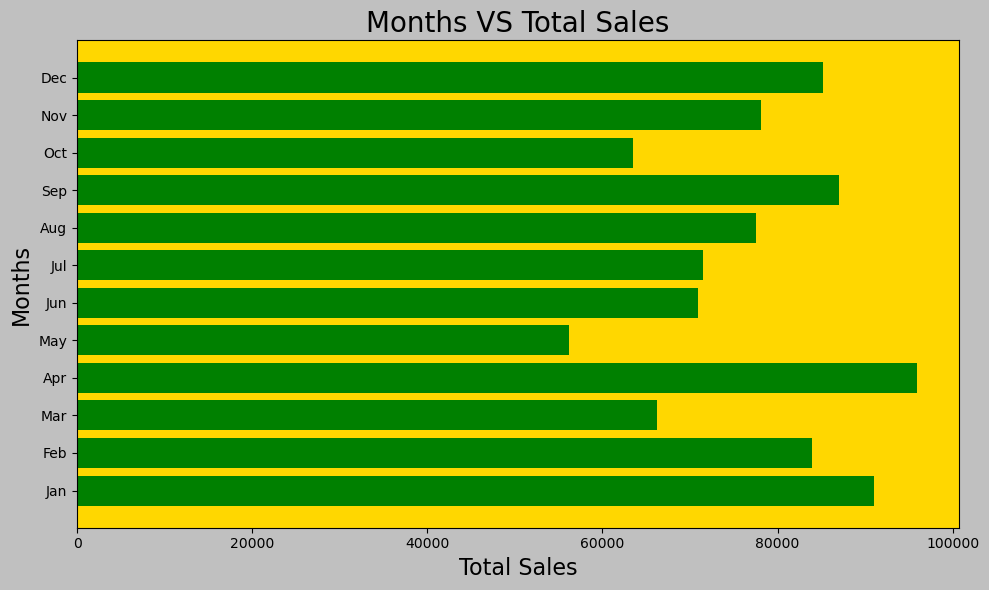

In [82]:
plt.figure(figsize=(10,6))
plt.barh(sales_data['month'],sales_data['Total Sales'], color= 'green')
plt.xlabel('Total Sales',fontsize=16)
plt.ylabel('Months',fontsize=16)
plt.title('Months VS Total Sales',fontsize=20)
plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')


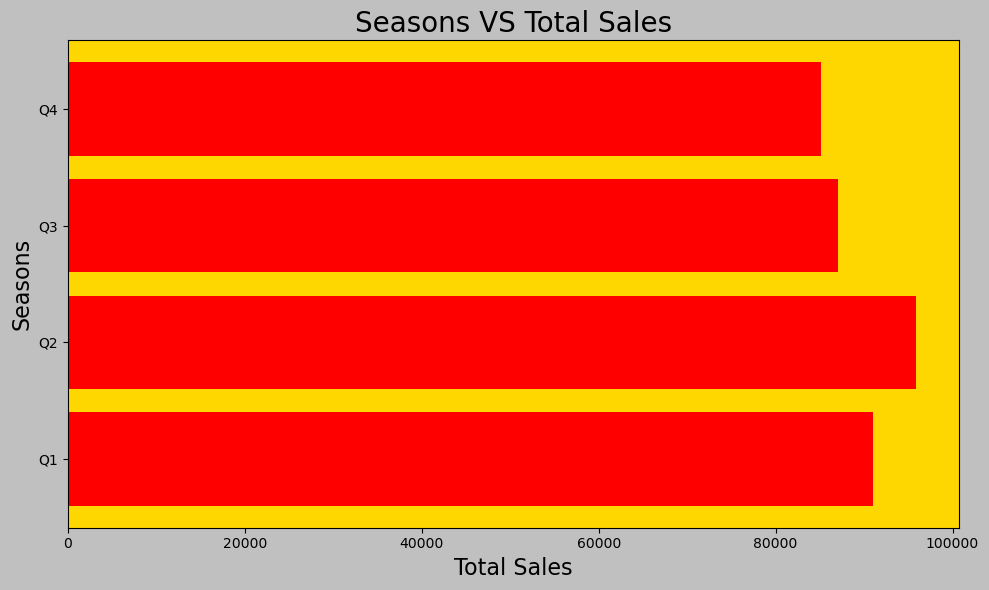

In [83]:
plt.figure(figsize=(10,6))
plt.barh(sales_data['Season'],sales_data['Total Sales'], color = 'r')
plt.xlabel('Total Sales',fontsize=16)
plt.ylabel('Seasons',fontsize=16)
plt.title('Seasons VS Total Sales',fontsize=20)
plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')


This visualization gives us more insight that there is high sales genertion in Quarter 2 of the year and less sales generation in Q4

## Total Revenue by Region

In [84]:
sales_data.pivot_table(index = 'Region', values='Total Sales', aggfunc= ['sum',max,min,'mean'],margins=True,margins_name='Grand total')

,sum,max,min,mean
,Total Sales,Total Sales,Total Sales,Total Sales
Region,,,,
East,1.818660e+06,78095.444953,447.179590,23618.959441
North,2.240204e+06,90973.809879,620.588015,25749.470670
South,2.201272e+06,85276.588256,362.282943,25897.315567
West,2.629695e+06,95922.209330,53.650961,22669.781359
Grand total,8.889830e+06,95922.209330,53.650961,24355.699414


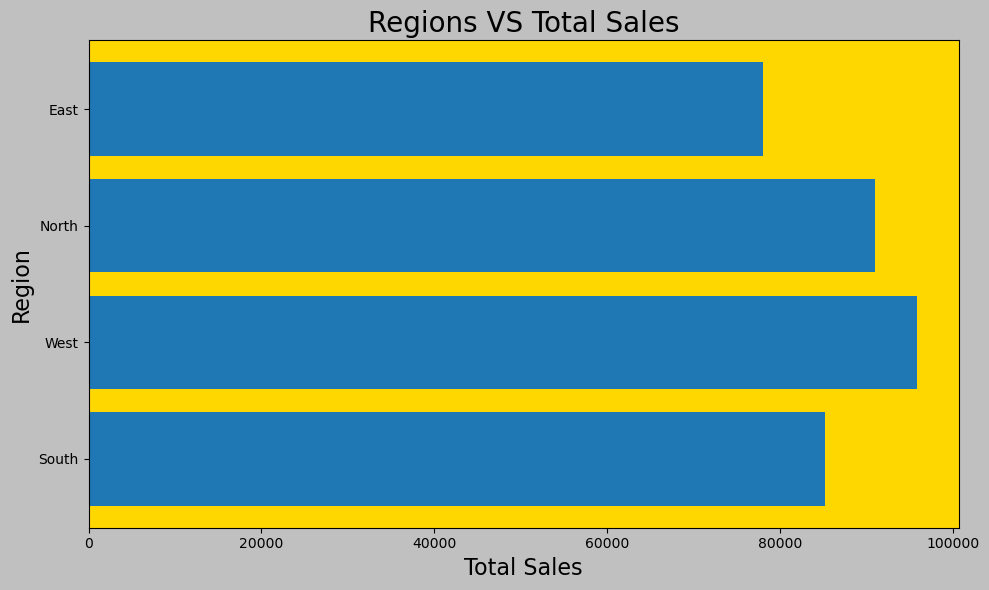

In [85]:
plt.figure(figsize=(10,6))
plt.barh(sales_data['Region'],sales_data['Total Sales'])
plt.xlabel('Total Sales',fontsize=16)
plt.ylabel('Region',fontsize=16)
plt.title('Regions VS Total Sales',fontsize=20)
plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')


Looking from this visualization we can tell the west region has the highest sales and East having the minimum Sales 


In [86]:
sales_data.groupby('Product')['Total Sales'].agg([sum,min,max,'mean'])


,sum,min,max,mean
Product,,,,
Clothing,2.706584e+06,620.588015,85903.978449,22185.116290
Electronics,3.180736e+06,53.650961,95922.209330,26955.390507
Furniture,3.002510e+06,500.158314,76526.666813,24020.080150


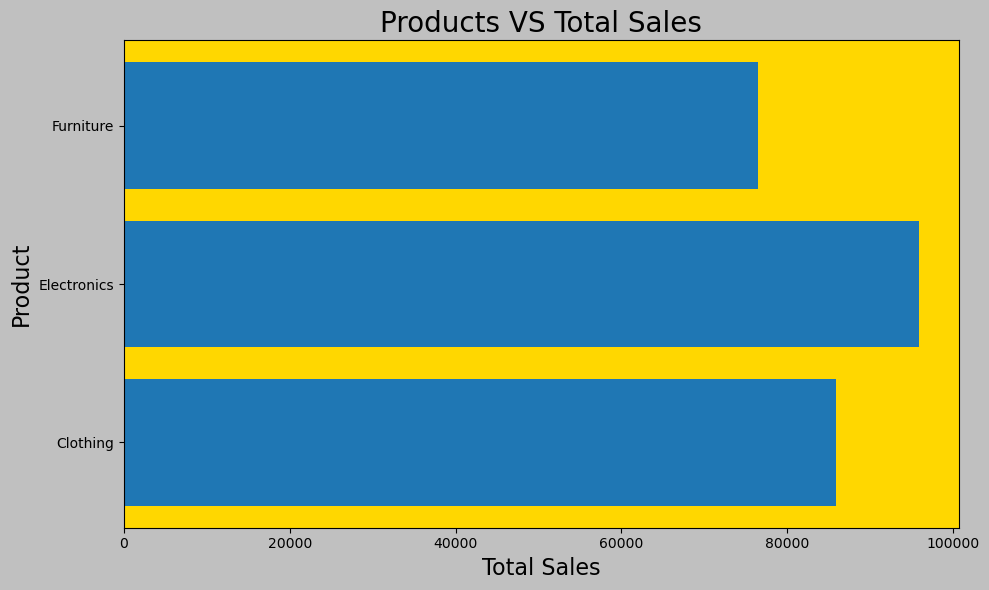

In [87]:
plt.figure(figsize=(10,6))
plt.barh(sales_data['Product'],sales_data['Total Sales'])
plt.xlabel('Total Sales',fontsize=16)
plt.ylabel('Product',fontsize=16)
plt.title('Products VS Total Sales',fontsize=20)
plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')


From Visulaization we can tell Electronics generating the highest Sales and Furniture having the least sales

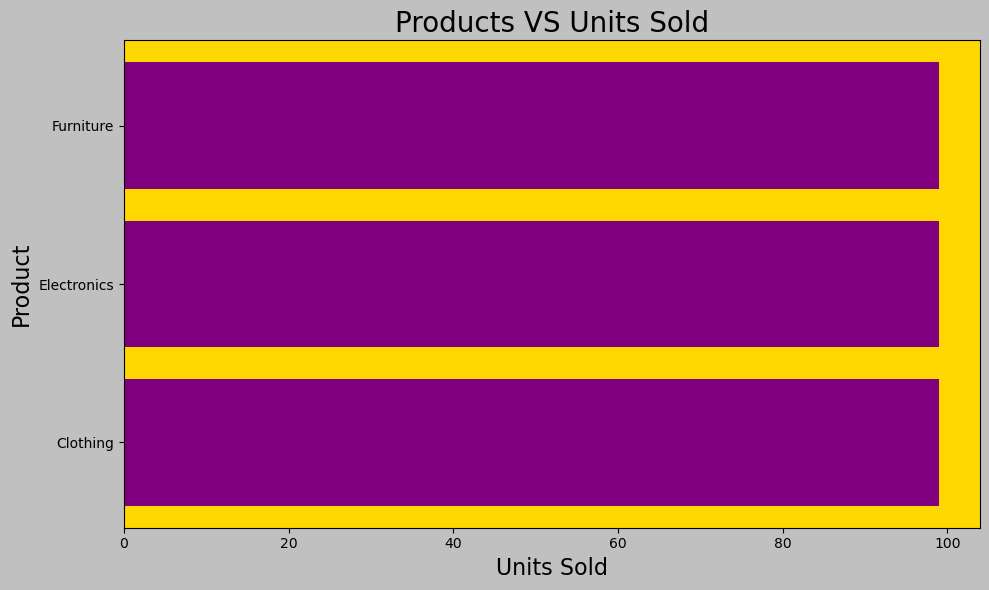

In [88]:
plt.figure(figsize=(10,6))
plt.barh(sales_data['Product'],sales_data['Units Sold'], color= 'purple')
plt.xlabel('Units Sold',fontsize=16)
plt.ylabel('Product',fontsize=16)
plt.title('Products VS Units Sold',fontsize=20)
plt.tight_layout()
plt.gcf().patch.set_facecolor('silver')
plt.gca().set_facecolor('gold')


From Visulaization we can tell theres was an equal number of units sold per products

In [89]:
sales_data.pivot_table(index='year', values= 'Total Sales', aggfunc= [sum,'mean',max,min])

,sum,mean,max,min
,Total Sales,Total Sales,Total Sales,Total Sales
year,,,,
2024,8.889830e+06,24355.699414,95922.20933,53.650961


## Total revenue for the year $8,889,830

## QUANTITATIVE ANALYSIS

In [90]:
sales_data_pivot = sales_data.pivot_table(index= 'Region', columns = 'Product', values= 'Units Sold', aggfunc= [max,min,'sum','mean'])
# rename the columns
sales_data_pivot.columns.name=''
# print the pivot table
sales_data_pivot
# Styling: Changing Background Color for Column Headers
headers = {
    'selector': 'th.col_heading',
    'props': 'background-color: #5E17EB; color: white;'
}

index_style = {
    'selector': 'th.index_name',
    'props': 'background-color: #5E17EB; color: white;'
}

sales_data_pivot_style = (
     sales_data_pivot
        .style
            .set_table_styles([headers,index_style])
            .set_properties(**{'background-color': '#ECE3FF','color': 'black'})
)

sales_data_pivot_style



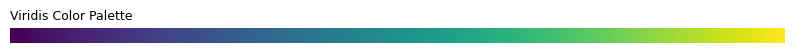

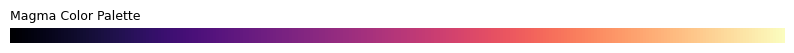

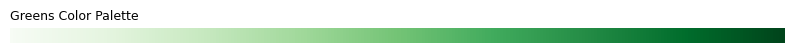

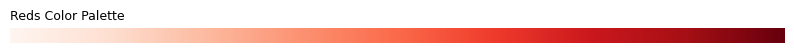

In [91]:
# Define the colormap
for cmap_item in ['viridis', 'magma','Greens','Reds']:
    cmap = plt.get_cmap(cmap_item)
    # Create a color gradient
    gradient = np.linspace(0, 1, 256).reshape(1, -1)

    # Display the color palette
    plt.figure(figsize=(10, 0.2))
    plt.imshow(gradient, aspect='auto', cmap=cmap)
    plt.axis('off')
    plt.title(f'{cmap_item.capitalize()} Color Palette', loc='left', fontsize=9)
    plt.show()


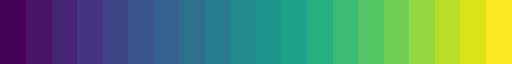

In [92]:

plt.get_cmap('viridis',lut=20)


## UNITS SOLD VS REGION VS PRODUCT

In [93]:
(
    sales_data_pivot
        .style
            .set_table_styles([headers, index_style])
            .background_gradient(cmap='viridis',subset=sales_data_pivot.columns)
)

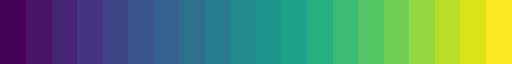

In [94]:
sales_data_pivot = sales_data.pivot_table(index= 'Region', columns = 'Product', values= 'Total Sales', aggfunc= [max,min,'sum','mean'])
plt.get_cmap('viridis',lut=20)

 ## TOTAL SALES VS REGION VS PRODUCT

In [95]:
(
    sales_data_pivot
        .style
            .set_table_styles([headers, index_style])
            .background_gradient(cmap='viridis',subset=sales_data_pivot.columns)
)

# Predictive Analysis

In [99]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [100]:
train= sales_data.drop(['Total Sales','Product','Region','Day_of_week','month','Season','year'], axis =1)
test = sales_data['Total Sales']

#performing 80/20 data split
X_train, X_test,y_train, y_test = train_test_split(train,test,test_size=0.3,random_state=1)

#data dimension
X_train.shape, y_train.shape

X_test.shape, y_test.shape

((110, 2), (110,))

In [102]:




#Build linear regression
regr = LinearRegression()
regr.fit(X_train,y_train)


pred = regr.predict(X_test)

regr.score(X_test, y_test)

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)
print('Mean Squared error(MSF) %.f' % mean_squared_error
(y_test, pred))
print('Coefficient of determination: %.2f' % r2_score(y_test,pred))


Coefficients: [506.8880799   51.11883959]
Intercept: -25704.511449280777
Mean Squared error(MSF) 65524735
Coefficient of determination: 0.84


In [103]:
pred

array([ -4578.71097087,  27907.19925929,  10097.04403619,  49826.86981925,
        33794.64688755,  35691.58327695,   5509.54138668,  10221.6944064 ,
        39333.90089223,  -7730.32532299,  28741.65132149,  31249.36555108,
        25274.95971319,  10730.28247436,  47337.32055464,  19349.62994316,
        -7016.24988168,   6075.20501045,  21161.69873906,  30119.98501512,
        18787.07237452,  51524.25711107,  46076.90422942,  46662.91317434,
        63597.23453674,   4374.22652708,  30706.19203555,  -8538.0948077 ,
        64664.9573411 ,  33238.59405471,  26450.14823237,   9868.21745897,
        -5486.32364758,  -3477.77408708,  24095.58694976,  20199.76997494,
        19304.83524675,  27636.38093509,  36726.89543462,  40158.39194549,
        15171.87532822,  35226.67529536,  55822.95119298,  -2830.10650919,
         -651.20364388,  35071.04893075,  64545.04918772,   3804.33539751,
         1181.95057212,  -7830.40951144,  12249.23847658,  34354.10822732,
        30836.64351029,  

# SUMMARY OF ANALYSIS

1. From analysis we could tell that we have Saturday having the highest revenue generated.
2. The weekend having the best sales generation,Saturday boosting with high revenue and Wednesday having less sales.
3. Looking from analysis we have equal number of Units sold but Electronics having more Revenue generated, and Furniture having the least revenue          genearated
4. For Quarterly revenue we have the Second Quarter having the highest revenue trend and Q4 having the least revenue generation.
5. We have more sales during the summer than during the winter.
6. Also from quantitative analysis and visualization we noticed the north has the highest Sales and Unit sold